# Tweepy Sentiment Analysis Homework Assignment - Brooke Cooper

* View the `tweepy` API documentation here: http://docs.tweepy.org/en/v3.8.0/getting_started.html
* View VaderSentiment documentation here: https://github.com/cjhutto/vaderSentiment

### News Organization Sentiment Analysis Scatter Plots
![Images](Images/bbc_output.png)
![Images](Images/cbs_output.png)
![Images](Images/cnn_output.png)
![Images](Images/fox_output.png)
![Images](Images/nyt_output.png)

### Average Sentiment Analysis by News Organization - Bar Chart

![Images](Images/5_major_news_orgs_output.png)

In [1]:
%matplotlib inline

# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time
import calendar
from datetime import date, datetime, timedelta

In [2]:
# Extract various Twitter API keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

# The JSON Parser works differently with the Tweepy Cursor
# api = tweepy.API(auth)

In [4]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Pull 100 Tweets for Each News Organization Via Nested For Loops Using JSON and Without Cursor
* I originally tried to do this with Cursor.  It returned 1500 items, even when I set the individual batch limit at 100, which should have returned 500 tweets.  So I reverted to the tried and true original API in conjunction with JSON. 
* In any event, I didn't wait to sort out the Cursor vs. Original API issues.  I just forged ahead using Cursor for each news organization.  And once I had completed the effort, I circled back and finally completed the original iterative query.  In any event, I would be fine solving the issue either way.
* Even though I ultimately got through this exercise, I should spend more time with the API documentation.

In [5]:
# List of target news organization accounts
user_accounts = ["bbcnews", "cbsnews", "cnn", "foxnews", "nytimes"]

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
text = []
twitter_user = []

for x in range(5):
    
    # Loop for each news organization
    for user_account in user_accounts:
        
        # Capture the returned tweet data
        tweets = api.user_timeline(user_account, page=x)
        
        # For loop to process each of the 100 tweets returned for each request for each user account
        for t in tweets:
            
            tweet_id.append(t['user']['name'])
            created_at.append(t["created_at"])
            favorite_count.append(t["favorite_count"])
            text.append(t["text"])
            twitter_user.append(user_account)
        
# Build a tweets DataFrame
master_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': text    
    })

# set DataFrame to not truncate
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Preview dataframe
master_tweets_df

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,bbcnews,BBC News (UK),Mon Nov 23 22:35:33 +0000 2020,21,#BBCNewscast answers #BBCYourQuestions on today’s coronavirus developments\n \n💉 When could the Oxford University vac… https://t.co/FFusoWihGg
1,bbcnews,BBC News (UK),Mon Nov 23 22:32:07 +0000 2020,65,Covid-19: Boris Johnson faces political test over new tier system https://t.co/LHEqhpzUGI
2,bbcnews,BBC News (UK),Mon Nov 23 22:05:02 +0000 2020,2057,Michigan votes to certify Biden's win over Trump https://t.co/fsYoqIx0yb
3,bbcnews,BBC News (UK),Mon Nov 23 21:33:31 +0000 2020,114,Chinese spacecraft sets off on Moon sample quest https://t.co/UGoSnwn9nb
4,bbcnews,BBC News (UK),Mon Nov 23 21:29:11 +0000 2020,113,Grenfell Tower: Cladding firm 'stretched the truth' on fire safety https://t.co/mb5UPmPpn1
5,bbcnews,BBC News (UK),Mon Nov 23 21:02:08 +0000 2020,128,Labour chief whip demands apology from Jeremy Corbyn https://t.co/BIlfNRwSpq
6,bbcnews,BBC News (UK),Mon Nov 23 20:28:15 +0000 2020,48,Snapchat Spotlight to pay users $1m a day for viral hits https://t.co/Z1yzXwCiJ0
7,bbcnews,BBC News (UK),Mon Nov 23 19:46:04 +0000 2020,136,"“The Christmas holiday period, the loosenings around that… we all know that that is going to come at a risk”\n\nProf… https://t.co/Fdm7jRCxy0"
8,bbcnews,BBC News (UK),Mon Nov 23 19:36:36 +0000 2020,335,"""There will be no compulsory vaccination, that's not the way we do things in this country""\n\nBut, Prime Minister Bor… https://t.co/XxcR5WijGx"
9,bbcnews,BBC News (UK),Mon Nov 23 19:35:41 +0000 2020,67,"How can the roll-out of the vaccine happen smoothly? asks @BBCFergusWalsh\n\nBoris Johnson says there are ""immense"" l… https://t.co/wGTJw8Las8"


In [6]:
len(master_tweets_df)

500

### Using the Cursor Method to capture 100 tweets per news organizations at a time into its own dataframe.

In [8]:
# Resetting the API method for Cursor
api = tweepy.API(auth)

### BBC News

In [9]:
# Set BBC News user account
user_account = "bbcnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
bbc_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
bbc_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,bbcnews,1331003482254548999,2020-11-23 22:35:33,21,"#BBCNewscast answers #BBCYourQuestions on today’s coronavirus developments\n \n💉 When could the Oxford University vaccine be rolled out?\n🔓 What are the plans for ""tougher"" post-lockdown tiers in England?\n🔤 What is the word of the year for 2020?\n \nhttps://t.co/oKPKHEhBkz"
1,bbcnews,1331002618987032576,2020-11-23 22:32:07,70,Covid-19: Boris Johnson faces political test over new tier system https://t.co/LHEqhpzUGI
2,bbcnews,1330995802244853761,2020-11-23 22:05:02,2160,Michigan votes to certify Biden's win over Trump https://t.co/fsYoqIx0yb
3,bbcnews,1330987870354624513,2020-11-23 21:33:31,115,Chinese spacecraft sets off on Moon sample quest https://t.co/UGoSnwn9nb
4,bbcnews,1330986779143442432,2020-11-23 21:29:11,118,Grenfell Tower: Cladding firm 'stretched the truth' on fire safety https://t.co/mb5UPmPpn1


In [10]:
len(bbc_tweets_df)

100

In [11]:
# Set tweets series as data source for analysis
tweet_text_series = bbc_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
bbc_tweets_df["Compound SA"] = compound
bbc_tweets_df["Positive SA"] = positive
bbc_tweets_df["Neutral SA"] = neutral
bbc_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
bbc_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
bbc_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,bbcnews,1331003482254548999,2020-11-23 22:35:33,21,"#BBCNewscast answers #BBCYourQuestions on today’s coronavirus developments\n \n💉 When could the Oxford University vaccine be rolled out?\n🔓 What are the plans for ""tougher"" post-lockdown tiers in England?\n🔤 What is the word of the year for 2020?\n \nhttps://t.co/oKPKHEhBkz",0.3049,0.053,0.947,0.000
1,bbcnews,1331002618987032576,2020-11-23 22:32:07,70,Covid-19: Boris Johnson faces political test over new tier system https://t.co/LHEqhpzUGI,0.0000,0.000,1.000,0.000
2,bbcnews,1330995802244853761,2020-11-23 22:05:02,2160,Michigan votes to certify Biden's win over Trump https://t.co/fsYoqIx0yb,0.5859,0.322,0.678,0.000
3,bbcnews,1330987870354624513,2020-11-23 21:33:31,115,Chinese spacecraft sets off on Moon sample quest https://t.co/UGoSnwn9nb,0.0000,0.000,1.000,0.000
4,bbcnews,1330986779143442432,2020-11-23 21:29:11,118,Grenfell Tower: Cladding firm 'stretched the truth' on fire safety https://t.co/mb5UPmPpn1,0.4019,0.329,0.516,0.155


The period began at 2020-11-23 00:08:17 and ended at 2020-11-23 22:35:33.
The duration was 0 days 22:27:16.


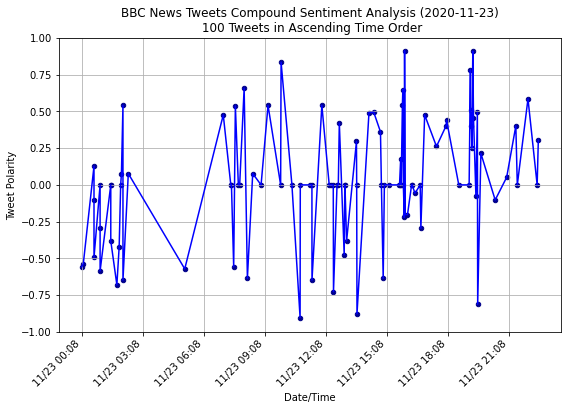

In [12]:
# Extract date-time stamps from dataframe to a list
time_series = bbc_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = bbc_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"BBC News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
bbc_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/bbc_output.png')

### CBS News

In [13]:
# Set CBS News user account
user_account = "cbsnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
cbs_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
cbs_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,cbsnews,1331027648773033987,2020-11-24 00:11:35,5,"Will Biden tap a U.N. ambassador to ""reclaim America's leading position""? https://t.co/aBXk7E0EpM"
1,cbsnews,1331025186389438465,2020-11-24 00:01:48,0,"RT @CBSEveningNews: TEXT OF THANKS: A mistaken text brought together a grandma and a 17-year-old back in 2016, and they’ve kept the traditi…"
2,cbsnews,1331025171860295681,2020-11-24 00:01:44,0,RT @CBSEveningNews: Jeopardy! says it will resume production next Monday with interim guest hosts following the death of Alex Trebek.\n\nAll-…
3,cbsnews,1331025155380940801,2020-11-24 00:01:40,0,RT @CBSEveningNews: GOVERNMENT ORDERED RECALL: A federal recall has been issued for nearly six million General Motors SUVs and pick up truc…
4,cbsnews,1331025137416679424,2020-11-24 00:01:36,0,RT @CBSEveningNews: SURGE IN THE HEARTLAND: South Dakota has reported more COVID-19 deaths per capita over the last week than anywhere else…


In [14]:
len(cbs_tweets_df)

100

In [15]:
# Set tweets series as data source for analysis
tweet_text_series = cbs_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
cbs_tweets_df["Compound SA"] = compound
cbs_tweets_df["Positive SA"] = positive
cbs_tweets_df["Neutral SA"] = neutral
cbs_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
cbs_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
cbs_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,cbsnews,1331027648773033987,2020-11-24 00:11:35,5,"Will Biden tap a U.N. ambassador to ""reclaim America's leading position""? https://t.co/aBXk7E0EpM",0.0000,0.000,1.000,0.000
1,cbsnews,1331025186389438465,2020-11-24 00:01:48,0,"RT @CBSEveningNews: TEXT OF THANKS: A mistaken text brought together a grandma and a 17-year-old back in 2016, and they’ve kept the traditi…",0.2808,0.134,0.774,0.092
2,cbsnews,1331025171860295681,2020-11-24 00:01:44,0,RT @CBSEveningNews: Jeopardy! says it will resume production next Monday with interim guest hosts following the death of Alex Trebek.\n\nAll-…,-0.8070,0.000,0.723,0.277
3,cbsnews,1331025155380940801,2020-11-24 00:01:40,0,RT @CBSEveningNews: GOVERNMENT ORDERED RECALL: A federal recall has been issued for nearly six million General Motors SUVs and pick up truc…,0.0000,0.000,1.000,0.000
4,cbsnews,1331025137416679424,2020-11-24 00:01:36,0,RT @CBSEveningNews: SURGE IN THE HEARTLAND: South Dakota has reported more COVID-19 deaths per capita over the last week than anywhere else…,0.0000,0.000,1.000,0.000


The period began at 2020-11-23 05:19:55 and ended at 2020-11-24 00:11:35.
The duration was 0 days 18:51:40.


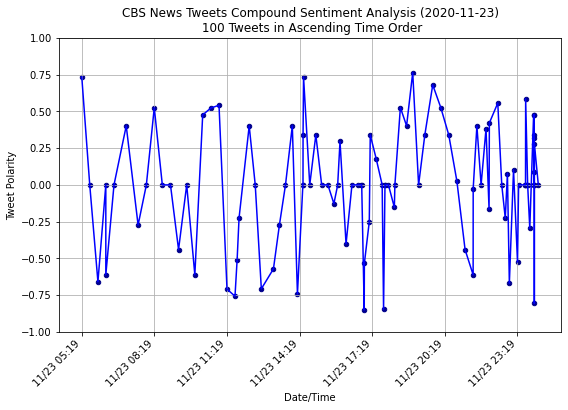

In [16]:
# Extract date-time stamps from dataframe to a list
time_series = cbs_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = cbs_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"CBS News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
cbs_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/cbs_output.png')

### CNN

In [17]:
# Set CNN user account
user_account = "CNN"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
cnn_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
cnn_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,CNN,1331025863228485639,2020-11-24 00:04:29,84,"A North Atlantic right whale calf was discovered dead on the shore of a barrier island off North Carolina on Friday, according to officials https://t.co/Op2VXU12Nq"
1,CNN,1331021560962945026,2020-11-23 23:47:23,868,Read the letter: https://t.co/QiIAktOQpp
2,CNN,1331015222224621569,2020-11-23 23:22:12,10879,"JUST IN: The Trump administration has informed President-elect Joe Biden that they are ready to begin the formal transition process, according to a letter obtained by CNN https://t.co/dpFAjWgmOn"
3,CNN,1331011583225569283,2020-11-23 23:07:45,199,Here are a few winter romcoms to take our minds off real life https://t.co/Dxx8yW96ZM
4,CNN,1331006081124999173,2020-11-23 22:45:53,485,"Dr. Sanjay Gupta shares his tips on how to celebrate a safe Thanksgiving. The safest option is to skip in-person gatherings, he says. https://t.co/Z9ISbpOlFT https://t.co/1v49fPMAtd"


In [18]:
len(cnn_tweets_df)

100

In [19]:
# Set tweets series as data source for analysis
tweet_text_series = cnn_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
cnn_tweets_df["Compound SA"] = compound
cnn_tweets_df["Positive SA"] = positive
cnn_tweets_df["Neutral SA"] = neutral
cnn_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
cnn_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
cnn_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,CNN,1331025863228485639,2020-11-24 00:04:29,84,"A North Atlantic right whale calf was discovered dead on the shore of a barrier island off North Carolina on Friday, according to officials https://t.co/Op2VXU12Nq",-0.7003,0.000,0.799,0.201
1,CNN,1331021560962945026,2020-11-23 23:47:23,868,Read the letter: https://t.co/QiIAktOQpp,0.0000,0.000,1.000,0.000
2,CNN,1331015222224621569,2020-11-23 23:22:12,10879,"JUST IN: The Trump administration has informed President-elect Joe Biden that they are ready to begin the formal transition process, according to a letter obtained by CNN https://t.co/dpFAjWgmOn",0.3612,0.085,0.915,0.000
3,CNN,1331011583225569283,2020-11-23 23:07:45,199,Here are a few winter romcoms to take our minds off real life https://t.co/Dxx8yW96ZM,0.0000,0.000,1.000,0.000
4,CNN,1331006081124999173,2020-11-23 22:45:53,485,"Dr. Sanjay Gupta shares his tips on how to celebrate a safe Thanksgiving. The safest option is to skip in-person gatherings, he says. https://t.co/Z9ISbpOlFT https://t.co/1v49fPMAtd",0.8885,0.354,0.646,0.000


The period began at 2020-11-22 21:41:06 and ended at 2020-11-24 00:04:29.
The duration was 1 days 02:23:23.


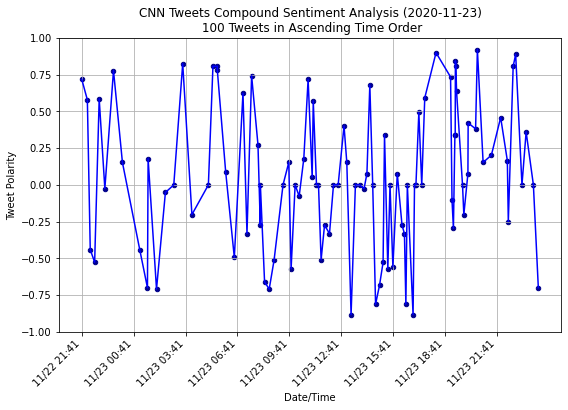

In [20]:
# Extract date-time stamps from dataframe to a list
time_series = cnn_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = cnn_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"CNN Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
cnn_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/cnn_output.png')

### Fox News

In [21]:
# Set Fox News user account
user_account = "foxnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
fox_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
fox_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,foxnews,1331021295992135680,2020-11-23 23:46:20,728,GSA chief informs President-elect Biden that formal transition process can begin https://t.co/XgJYp1pbLC
1,foxnews,1330990931621851142,2020-11-23 21:45:41,568,Pa. Supreme Court rejects Trump challenge to absentee ballots in Allegheny County https://t.co/6xm9o2syHk
2,foxnews,1330990424090152961,2020-11-23 21:43:40,737,Mattis says he hopes Joe Biden takes 'America First' out of national security strategy https://t.co/uqOtE3T5sQ
3,foxnews,1330990025887125510,2020-11-23 21:42:05,53,"Get your copy - pre-order today: Pete Hegseth’s ""Modern Warriors: Real Stories from Real Heroes,"" available in bookstores starting Nov. 24. https://t.co/ROuK8aCWF1 https://t.co/F8nDd59NUy"
4,foxnews,1330973072845901828,2020-11-23 20:34:43,387,Biden to tap former Fed Chair Janet Yellen as Treasury secretary: report https://t.co/tXapuCSNpz


In [22]:
len(fox_tweets_df)

100

In [23]:
# Set tweets series as data source for analysis
tweet_text_series = fox_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
fox_tweets_df["Compound SA"] = compound
fox_tweets_df["Positive SA"] = positive
fox_tweets_df["Neutral SA"] = neutral
fox_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
fox_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
fox_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,foxnews,1331021295992135680,2020-11-23 23:46:20,728,GSA chief informs President-elect Biden that formal transition process can begin https://t.co/XgJYp1pbLC,0.0000,0.000,1.000,0.000
1,foxnews,1330990931621851142,2020-11-23 21:45:41,568,Pa. Supreme Court rejects Trump challenge to absentee ballots in Allegheny County https://t.co/6xm9o2syHk,-0.1027,0.255,0.469,0.276
2,foxnews,1330990424090152961,2020-11-23 21:43:40,737,Mattis says he hopes Joe Biden takes 'America First' out of national security strategy https://t.co/uqOtE3T5sQ,0.6369,0.286,0.714,0.000
3,foxnews,1330990025887125510,2020-11-23 21:42:05,53,"Get your copy - pre-order today: Pete Hegseth’s ""Modern Warriors: Real Stories from Real Heroes,"" available in bookstores starting Nov. 24. https://t.co/ROuK8aCWF1 https://t.co/F8nDd59NUy",0.5106,0.130,0.870,0.000
4,foxnews,1330973072845901828,2020-11-23 20:34:43,387,Biden to tap former Fed Chair Janet Yellen as Treasury secretary: report https://t.co/tXapuCSNpz,0.2023,0.130,0.870,0.000


The period began at 2020-11-19 02:43:40 and ended at 2020-11-23 23:46:20.
The duration was 4 days 21:02:40.


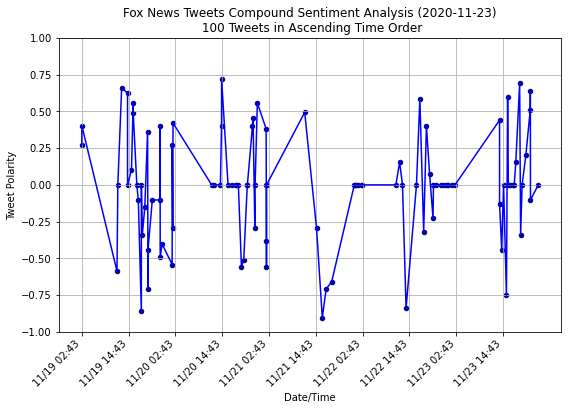

In [24]:
# Extract date-time stamps from dataframe to a list
time_series = fox_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=12))
dates = ticks_list

# Plot scatter
ax = fox_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"Fox News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
fox_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/fox_output.png')

### New York Times

In [25]:
# Set New York Times user account
user_account = "nytimes"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
nyt_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
nyt_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,nytimes,1331024760390774785,2020-11-24 00:00:06,412,"""Jeopardy!"" is not yet ready to name Alex Trebek's replacement. For now, Ken Jennings and other short-term hosts will fill in. https://t.co/XWu1XoKFeE"
1,nytimes,1331020980060385281,2020-11-23 23:45:05,136,"Political leaders and public health officials have recently blamed small gatherings for the rise in coronavirus cases. Though the virus can certainly spread at these get-togethers, they don't seem to be the driving force behind the surge, data shows. https://t.co/WTSslCKSpB"
2,nytimes,1331018242719174659,2020-11-23 23:34:12,4701,Breaking News: President Trump authorized his government to begin the transition to President-elect Joe Biden’s administration. https://t.co/qufPgXjJ4z
3,nytimes,1331014675958550533,2020-11-23 23:20:02,0,RT @aoscott: In which I do not quite argue (but sort of imply) that Tyler Perry would have the best choice to direct Hillbilly Elegy https:…
4,nytimes,1331009692454174720,2020-11-23 23:00:14,78,"Doctors have seen a spike in the number of women arriving in emergency rooms with serious complications, or already in labor, without having been to a single prenatal appointment. The problem has been particularly pronounced in Texas. Read more: https://t.co/QUDCDrgXjS"


In [26]:
len(nyt_tweets_df)

100

In [27]:
# Set tweets series as data source for analysis
tweet_text_series = nyt_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
nyt_tweets_df["Compound SA"] = compound
nyt_tweets_df["Positive SA"] = positive
nyt_tweets_df["Neutral SA"] = neutral
nyt_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
nyt_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
nyt_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,nytimes,1331024760390774785,2020-11-24 00:00:06,412,"""Jeopardy!"" is not yet ready to name Alex Trebek's replacement. For now, Ken Jennings and other short-term hosts will fill in. https://t.co/XWu1XoKFeE",-0.6707,0.000,0.784,0.216
1,nytimes,1331020980060385281,2020-11-23 23:45:05,136,"Political leaders and public health officials have recently blamed small gatherings for the rise in coronavirus cases. Though the virus can certainly spread at these get-togethers, they don't seem to be the driving force behind the surge, data shows. https://t.co/WTSslCKSpB",-0.1779,0.055,0.874,0.071
2,nytimes,1331018242719174659,2020-11-23 23:34:12,4701,Breaking News: President Trump authorized his government to begin the transition to President-elect Joe Biden’s administration. https://t.co/qufPgXjJ4z,0.0000,0.000,1.000,0.000
3,nytimes,1331014675958550533,2020-11-23 23:20:02,0,RT @aoscott: In which I do not quite argue (but sort of imply) that Tyler Perry would have the best choice to direct Hillbilly Elegy https:…,0.8139,0.236,0.764,0.000
4,nytimes,1331009692454174720,2020-11-23 23:00:14,78,"Doctors have seen a spike in the number of women arriving in emergency rooms with serious complications, or already in labor, without having been to a single prenatal appointment. The problem has been particularly pronounced in Texas. Read more: https://t.co/QUDCDrgXjS",-0.6486,0.030,0.820,0.150


The period began at 2020-11-23 01:40:06 and ended at 2020-11-24 00:00:06.
The duration was 0 days 22:20:00.


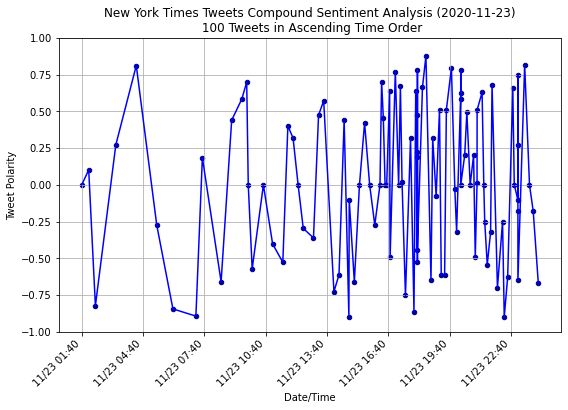

In [28]:
# Extract date-time stamps from dataframe to a list
time_series = nyt_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = nyt_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"New York Times Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
nyt_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/nyt_output.png')

### Average Sentiment Analysis by News Organization

In [29]:
# Calculate average compound sentiment analysis for each news organization
bbc_asa = bbc_tweets_df["Compound SA"].mean()
cbs_asa = cbs_tweets_df["Compound SA"].mean()
cnn_asa = cnn_tweets_df["Compound SA"].mean()
fox_asa = fox_tweets_df["Compound SA"].mean()
nyt_asa = nyt_tweets_df["Compound SA"].mean()

In [30]:
# Create a dictionary of news organizations and their compound sentiment analysis scores (key, values)
news_dict = {"BBC News": bbc_asa, "CBS News": cbs_asa, "CNN": cnn_asa, "Fox News": fox_asa, "NY Times": nyt_asa}

# Convert dictionary to Series
news_asa = pd.Series(news_dict)

# Convert Series to DataFrame
news_asa_df = pd.DataFrame(news_asa).reset_index()

# Rename column
news_asa_df.rename(columns={"index": "News Org", 0: "Avg Comp SA"}, inplace=True)

# Display DataFrame
news_asa_df

,News Org,Avg Comp SA
0,BBC News,0.026956
1,CBS News,0.003164
2,CNN,0.061341
3,Fox News,-0.007150
4,NY Times,0.023683


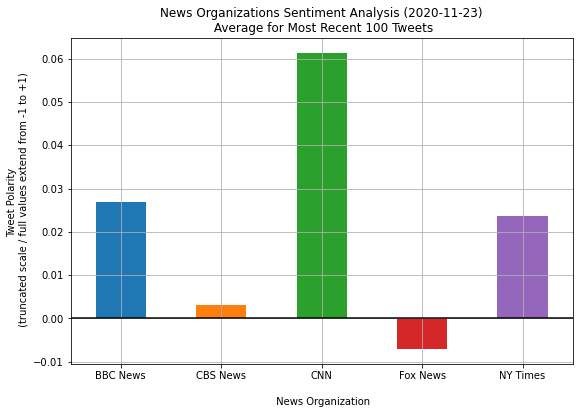

In [31]:
# Plot scatter
ax = news_asa_df.plot.bar(x='News Org',
                          y='Avg Comp SA',
                          title=f"News Organizations Sentiment Analysis ({date.today()})\n Average for Most Recent 100 Tweets",
                          legend=None,
                          rot=0,
                          grid=True,
                          color=['C0', 'C1', 'C2', 'C3', 'C4'],
                          figsize=(9,6))

# Set the x-axis label, y-axis label, and create heavy line y=0
ax.set_xlabel("\n News Organization")
ax.set_ylabel("Tweet Polarity \n (truncated scale / full values extend from -1 to +1)")
ax.axhline(y=0, alpha=3, color='black')   

# Save image as png-format file.
ax.figure.savefig('Images/5_major_news_orgs_output.png')